# ***Librerias***

In [263]:
def lib():
  !pip3 install -U matplotlib

  !pip3 install -U openpyxl
  !pip3 install -U pandas
  !pip3 install -U geopandas
  !pip3 install -U rasterio
  !pip3 install -U folium

  !pip3 install --upgrade pip

In [264]:
#lib()
#Descomentar si no está instalado

In [265]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import time
import glob
import random

from unidecode import unidecode


import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import rasterio
from rasterio.transform import from_origin

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


zoom=7

# ***Mapas Estaciones***

## Espana

In [266]:
'''

estaciones_españa = folium.Map(location=[40.416667, -3.703125], zoom_start=zoom)

folium.GeoJson(
    "./data/estaciones/españa/0. todas/auto.geojson",
    name="Estaciones Automaticas",
    marker=folium.CircleMarker(
        radius = 10,
        weight = 0,
        fill_color = 'purple', 
        fill_opacity = 1),
    tooltip=folium.GeoJsonTooltip(
        fields=['NOMBRE'],
        sticky=True
        )
).add_to(estaciones_españa)

folium.GeoJson(
    "./data/estaciones/españa/0. todas/comp.geojson",
    name="Estaciones Completas",
    marker=folium.CircleMarker(
        radius = 10,
        weight = 0,
        fill_color = 'green', 
        fill_opacity = 1),
    tooltip=folium.GeoJsonTooltip(
        fields=['NOMBRE'],
        sticky=True
        )
).add_to(estaciones_españa)

folium.GeoJson(
    "./data/estaciones/españa/0. todas/pluv.geojson",
    name="Estaciones Pluviometricas",
    marker=folium.CircleMarker(
        radius = 10,
        weight = 0,
        fill_color = 'blue', 
        fill_opacity = 1),
    tooltip=folium.GeoJsonTooltip(
        fields=['NOMBRE','ALTITUD','COORD_X','COORD_Y'],
        sticky=True
        )
).add_to(estaciones_españa)

folium.GeoJson(
    "./data/estaciones/españa/0. todas/term.geojson",
    name="Estaciones Termometricas",
    marker=folium.CircleMarker(
        radius = 10,
        weight = 0,
        fill_color = 'red', 
        fill_opacity = 1),
    tooltip=folium.GeoJsonTooltip(
        fields=['NOMBRE'],
        sticky=True
        )
).add_to(estaciones_españa)

folium.LayerControl().add_to(estaciones_españa)

estaciones_españa.save('./output/est_esp.html')

#'''

'\n\nestaciones_españa = folium.Map(location=[40.416667, -3.703125], zoom_start=zoom)\n\nfolium.GeoJson(\n    "./data/estaciones/españa/0. todas/auto.geojson",\n    name="Estaciones Automaticas",\n    marker=folium.CircleMarker(\n        radius = 10,\n        weight = 0,\n        fill_color = \'purple\', \n        fill_opacity = 1),\n    tooltip=folium.GeoJsonTooltip(\n        fields=[\'NOMBRE\'],\n        sticky=True\n        )\n).add_to(estaciones_españa)\n\nfolium.GeoJson(\n    "./data/estaciones/españa/0. todas/comp.geojson",\n    name="Estaciones Completas",\n    marker=folium.CircleMarker(\n        radius = 10,\n        weight = 0,\n        fill_color = \'green\', \n        fill_opacity = 1),\n    tooltip=folium.GeoJsonTooltip(\n        fields=[\'NOMBRE\'],\n        sticky=True\n        )\n).add_to(estaciones_españa)\n\nfolium.GeoJson(\n    "./data/estaciones/españa/0. todas/pluv.geojson",\n    name="Estaciones Pluviometricas",\n    marker=folium.CircleMarker(\n        radius = 1

## Colombia

In [267]:
'''

estaciones_colombia = folium.Map(location=[4.570868, -74.297333], zoom_start=zoom)

folium.GeoJson(
    "./data/estaciones/colombia/0. todas/estaciones.geojson",
    name="Estaciones Automaticas",
    marker=folium.CircleMarker(
        radius = 10,
        weight = 0,
        fill_color = 'red', 
        fill_opacity = 1),
    tooltip=folium.GeoJsonTooltip(
        fields=['Nombre'],
        )
).add_to(estaciones_colombia)

folium.LayerControl().add_to(estaciones_colombia)

estaciones_colombia.save('./output/est_col.html')

#'''

'\n\nestaciones_colombia = folium.Map(location=[4.570868, -74.297333], zoom_start=zoom)\n\nfolium.GeoJson(\n    "./data/estaciones/colombia/0. todas/estaciones.geojson",\n    name="Estaciones Automaticas",\n    marker=folium.CircleMarker(\n        radius = 10,\n        weight = 0,\n        fill_color = \'red\', \n        fill_opacity = 1),\n    tooltip=folium.GeoJsonTooltip(\n        fields=[\'Nombre\'],\n        )\n).add_to(estaciones_colombia)\n\nfolium.LayerControl().add_to(estaciones_colombia)\n\nestaciones_colombia.save(\'./output/est_col.html\')\n\n#'

# ***Mapas Temperatura***

## Espana

In [268]:
'''

def get_tiff_bbox(tiff_path):
    with rasterio.open(tiff_path) as dataset:
        left, bottom, right, top = dataset.bounds
        bbox = [[bottom, left], [top, right]]
    return bbox

def read_tiff_data(tiff_path):
    with rasterio.open(tiff_path) as dataset:
        data = dataset.read([1, 2, 3, 4])  # Read all four bands
        data = np.moveaxis(data, 0, -1)  # Move the band dimension to the last axis
    return data

tiff_path = "./data/temperatura/españa/anual.tiff"

mapa_temp_esp = folium.Map(location=[40.416667, -3.703125], zoom_start=zoom)

bbox = get_tiff_bbox(tiff_path)
data = read_tiff_data(tiff_path)

folium.raster_layers.ImageOverlay(
    image=data[:, :, :],
    bounds=bbox,
    opacity=1,
    name="Temperature Map"
).add_to(mapa_temp_esp)

folium.LayerControl().add_to(mapa_temp_esp)

mapa_temp_esp.save('./output/temp_esp.html')

#'''


'\n\ndef get_tiff_bbox(tiff_path):\n    with rasterio.open(tiff_path) as dataset:\n        left, bottom, right, top = dataset.bounds\n        bbox = [[bottom, left], [top, right]]\n    return bbox\n\ndef read_tiff_data(tiff_path):\n    with rasterio.open(tiff_path) as dataset:\n        data = dataset.read([1, 2, 3, 4])  # Read all four bands\n        data = np.moveaxis(data, 0, -1)  # Move the band dimension to the last axis\n    return data\n\ntiff_path = "./data/temperatura/españa/anual.tiff"\n\nmapa_temp_esp = folium.Map(location=[40.416667, -3.703125], zoom_start=zoom)\n\nbbox = get_tiff_bbox(tiff_path)\ndata = read_tiff_data(tiff_path)\n\nfolium.raster_layers.ImageOverlay(\n    image=data[:, :, :],\n    bounds=bbox,\n    opacity=1,\n    name="Temperature Map"\n).add_to(mapa_temp_esp)\n\nfolium.LayerControl().add_to(mapa_temp_esp)\n\nmapa_temp_esp.save(\'./output/temp_esp.html\')\n\n#'

## Colombia

In [269]:
'''
mapa_temperatura_media_colombia = folium.Map(location=[4.570868, -74.297333], zoom_start=zoom)

def style_function(feature):
    clase = feature['properties']['clase']
    
    # Assign color based on the 'rango' value
    if clase == 'Calido':
        color = 'red'
    elif clase == 'Templado':
        color = 'yellow'
    elif clase == 'Frio':
        color = 'blue'
    elif clase == 'Muy frio':
        color = 'purple'
    else:
        color = 'blue'  # Default color if 'rango' is not defined or falls in another range

    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

folium.GeoJson(
    "./data/temperatura/colombia/Temp_Media_AA_PTerm_2012.geojson",
    name="Estaciones Automaticas",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['clase','rango'],
        ),
).add_to(mapa_temperatura_media_colombia)

mapa_temperatura_media_colombia.save('./output/temp_col.html')

#'''

'\nmapa_temperatura_media_colombia = folium.Map(location=[4.570868, -74.297333], zoom_start=zoom)\n\ndef style_function(feature):\n    clase = feature[\'properties\'][\'clase\']\n    \n    # Assign color based on the \'rango\' value\n    if clase == \'Calido\':\n        color = \'red\'\n    elif clase == \'Templado\':\n        color = \'yellow\'\n    elif clase == \'Frio\':\n        color = \'blue\'\n    elif clase == \'Muy frio\':\n        color = \'purple\'\n    else:\n        color = \'blue\'  # Default color if \'rango\' is not defined or falls in another range\n\n    return {\n        \'fillColor\': color,\n        \'color\': \'black\',\n        \'weight\': 1,\n        \'fillOpacity\': 0.7\n    }\n\nfolium.GeoJson(\n    "./data/temperatura/colombia/Temp_Media_AA_PTerm_2012.geojson",\n    name="Estaciones Automaticas",\n    style_function=style_function,\n    tooltip=folium.GeoJsonTooltip(\n        fields=[\'clase\',\'rango\'],\n        ),\n).add_to(mapa_temperatura_media_colombia)

# ***Estaciones Espana***

### Paca

In [270]:
ubicacion_paca = r'./data/estaciones/españa/paca/'
archivos_paca = glob.glob(ubicacion_paca + "/*.csv") #creamos una lista con los CSV

list_paca = [] 
for nombre_archivo_paca in archivos_paca:
    archivo_paca = pd.read_csv(nombre_archivo_paca, sep=";",decimal=',') # utilizamos sep para definir el separador del archivo CSV

    archivo_paca.columns = [unidecode(str(col)) for col in archivo_paca.columns]
    archivo_paca.columns = archivo_paca.columns.str.replace(' ', '_') # Reemplazar espacios por _  
    archivo_paca.columns = archivo_paca.columns.str.strip() # quitar espacios en blanco
    archivo_paca.columns = archivo_paca.columns.str.lower() # Minusculas
    archivo_paca.replace('-', np.nan, inplace=True) # Reemplazar NaN, None

    list_paca.append(archivo_paca)

paca = pd.concat(list_paca, ignore_index=True)
columnas_clean = ['hora_temp_max','hora_temp_min','hora_hum_max','hora_hum_min','hora_velmax']

paca = paca.drop(columns = columnas_clean)

paca['mes'] = pd.to_datetime(paca['fecha'], format='%d/%m/%Y').dt.month
paca['anno'] = pd.to_datetime(paca['fecha'], format='%d/%m/%Y').dt.year
paca['decada'] = (paca['anno'] // 10) * 10  # Extract decade
paca.head(5)

,fecha,temp_media_(oc),temp_max_(oc),temp_minima_(oc),humedad_media_(%),humedad_max_(%),humedad_min_(%),velviento_(m/s),dirviento_(o),velvientomax_(m/s),dir_viento_vel_max_(o),radiacion_(mj/m2),precipitacion_(mm),pepmon,etpmon,mes,anno,decada
0,01/01/2008,3.40,13.10,-4.46,73.80,95.4,28.80,1.36,51.43,3.95,140.90,10.35,0.2,0.0,1.27,1,2008,2000
1,02/01/2008,6.71,11.47,2.31,75.30,90.7,64.78,1.26,310.50,7.30,252.90,3.41,0.8,0.0,0.84,1,2008,2000
2,03/01/2008,6.65,11.40,1.97,74.50,87.9,58.44,1.52,235.10,7.05,300.20,5.02,2.4,0.0,0.99,1,2008,2000
3,04/01/2008,3.96,10.50,-1.04,73.10,92.1,47.47,1.42,21.33,6.23,37.19,10.67,0.0,0.0,1.00,1,2008,2000
4,05/01/2008,6.29,15.97,-1.78,64.48,85.2,30.47,1.31,16.61,5.64,231.10,9.90,0.0,0.0,1.42,1,2008,2000


### Totana

In [271]:
ubicacion_totana = r'./data/estaciones/españa/totana/'
archivos_totana = glob.glob(ubicacion_totana + "/*.csv") #creamos una lista con los CSV

list_totana = [] 
for nombre_archivo_totana in archivos_totana:
    archivo_totana = pd.read_csv(nombre_archivo_totana, sep=";",decimal=',') # utilizamos sep para definir el separador del archivo CSV

    archivo_totana.columns = [unidecode(str(col)) for col in archivo_totana.columns]
    archivo_totana.columns = archivo_totana.columns.str.replace(' ', '_') # Reemplazar espacios por _  
    archivo_totana.columns = archivo_totana.columns.str.strip() # quitar espacios en blanco
    archivo_totana.columns = archivo_totana.columns.str.lower() # Minusculas
    archivo_totana.replace('-', np.nan, inplace=True) # Reemplazar NaN, None

    list_totana.append(archivo_totana)

totana = pd.concat(list_totana, ignore_index=True)
columnas_clean = ['hora_temp_max','hora_temp_min','hora_hum_max','hora_hum_min','hora_velmax']

totana = totana.drop(columns = columnas_clean)

totana['mes'] = pd.to_datetime(totana['fecha'], format='%d/%m/%Y').dt.month
totana['anno'] = pd.to_datetime(totana['fecha'], format='%d/%m/%Y').dt.year
totana['decada'] = (totana['anno'] // 10) * 10  # Extract decade
totana.head(5)

,fecha,temp_media_(oc),temp_max_(oc),temp_minima_(oc),humedad_media_(%),humedad_max_(%),humedad_min_(%),velviento_(m/s),dirviento_(o),velvientomax_(m/s),dir_viento_vel_max_(o),radiacion_(mj/m2),precipitacion_(mm),pepmon,etpmon,mes,anno,decada
0,01/01/2008,6.18,15.01,0.51,74.80,89.8,36.05,1.84,248.0,4.81,228.90,10.36,0.0,0.0,1.57,1,2008,2000
1,02/01/2008,6.04,12.12,0.57,84.10,95.6,63.19,1.35,256.2,4.64,252.70,3.62,1.2,0.0,0.87,1,2008,2000
2,03/01/2008,8.86,13.65,4.71,74.60,90.2,53.32,1.60,244.6,7.26,256.20,4.22,1.0,0.0,1.16,1,2008,2000
3,04/01/2008,7.82,14.07,3.32,67.33,88.1,39.81,1.16,259.7,6.10,46.53,10.43,0.0,0.0,1.14,1,2008,2000
4,05/01/2008,8.93,16.94,2.32,63.15,82.6,33.90,1.40,258.6,4.07,233.00,10.25,0.0,0.0,1.51,1,2008,2000


### Purias

In [272]:
ubicacion_purias = r'./data/estaciones/españa/purias/'
archivos_purias = glob.glob(ubicacion_purias + "/*.csv") #creamos una lista con los CSV

list_purias = [] 
for nombre_archivo_purias in archivos_purias:
    archivo_purias = pd.read_csv(nombre_archivo_purias, sep=";",decimal=',') # utilizamos sep para definir el separador del archivo CSV

    archivo_purias.columns = [unidecode(str(col)) for col in archivo_purias.columns]
    archivo_purias.columns = archivo_purias.columns.str.replace(' ', '_') # Reemplazar espacios por _  
    archivo_purias.columns = archivo_purias.columns.str.strip() # quitar espacios en blanco
    archivo_purias.columns = archivo_purias.columns.str.lower() # Minusculas
    archivo_purias.replace('-', np.nan, inplace=True) # Reemplazar NaN, None

    list_purias.append(archivo_purias)

purias = pd.concat(list_purias, ignore_index=True)
columnas_clean = ['hora_temp_max','hora_temp_min','hora_hum_max','hora_hum_min','hora_velmax']

purias = purias.drop(columns = columnas_clean)

purias['mes'] = pd.to_datetime(purias['fecha'], format='%d/%m/%Y').dt.month
purias['anno'] = pd.to_datetime(purias['fecha'], format='%d/%m/%Y').dt.year
purias['decada'] = (purias['anno'] // 10) * 10  # Extract decade
purias.head(5)

,fecha,temp_media_(oc),temp_max_(oc),temp_minima_(oc),humedad_media_(%),humedad_max_(%),humedad_min_(%),velviento_(m/s),dirviento_(o),velvientomax_(m/s),dir_viento_vel_max_(o),radiacion_(mj/m2),precipitacion_(mm),pepmon,etpmon,mes,anno,decada
0,01/01/2008,5.67,14.15,0.08,78.90,95.0,33.77,1.33,105.30,4.98,196.8,9.62,0.2,0.0,1.27,1,2008,2000
1,02/01/2008,6.99,12.42,0.21,79.30,94.2,60.63,1.53,186.60,6.60,232.2,3.70,0.4,0.0,0.96,1,2008,2000
2,03/01/2008,9.29,12.96,4.80,69.55,87.2,53.91,1.93,208.10,9.93,300.7,3.33,0.8,0.0,1.25,1,2008,2000
3,04/01/2008,7.50,13.33,3.04,65.71,88.4,40.20,1.74,66.22,7.49,351.5,9.87,0.0,0.0,1.38,1,2008,2000
4,05/01/2008,8.54,17.53,2.49,59.47,83.3,26.94,1.17,93.10,3.88,88.3,7.61,0.0,0.0,1.51,1,2008,2000


# ***Estaciones Colombia***

## Temperatura media

In [273]:
def separate_and_average(min_max_df):
    min_temp_df = min_max_df[min_max_df['DescripcionSerie'] == 'Temperatura mínima diaria']
    max_temp_df = min_max_df[min_max_df['DescripcionSerie'] == 'Temperatura máxima diaria']

    merged_df = pd.merge(min_temp_df, max_temp_df, on='Fecha', suffixes=('_min', '_max'))

    merged_df.dropna(subset=['Valor_min', 'Valor_max'], inplace=True)

    merged_df['temp_media_(oc)'] = (merged_df['Valor_min'] + merged_df['Valor_max']) / 2

    return merged_df[['Fecha', 'Valor_min', 'Valor_max', 'temp_media_(oc)']]

### Santa Fé

In [274]:
dirty_santa_fe = pd.read_csv('./data/estaciones/colombia/santa_fe/excel.csv.csv')

columnas_clean = ['FechaInstalacion','NombreEstacion','CodigoEstacion','Categoria','Entidad','AreaOperativa','FechaSuspension','IdParametro','Etiqueta','Frecuencia','Grado','Calificador','NivelAprobacion']
clean_santa_fe = dirty_santa_fe.drop(columns = columnas_clean)
santa_fe = separate_and_average(clean_santa_fe)
santa_fe['Fecha'] = pd.to_datetime(santa_fe['Fecha'], format='%Y-%m-%d %H:%M')
santa_fe['mes'] = santa_fe['Fecha'].dt.month
santa_fe['anno'] = santa_fe['Fecha'].dt.year
santa_fe['decada'] = (santa_fe['anno'] // 10) * 10
santa_fe.sample(5)

,Fecha,Valor_min,Valor_max,temp_media_(oc),mes,anno,decada
209307,2011-01-24,18.6,34.8,26.7,1,2011,2010
202053,2010-05-16,22.4,37.2,29.8,5,2010,2010
63616,2003-01-20,19.0,35.4,27.2,1,2003,2000
293740,2015-06-09,21.4,30.6,26.0,6,2015,2010
294117,2015-06-17,21.4,33.4,27.4,6,2015,2010


### Villa de Leyva

In [275]:
dirty_villa_de_leyva = pd.read_csv('./data/estaciones/colombia/villa_de_leyva/excel.csv.csv')

columnas_clean = ['FechaInstalacion','NombreEstacion','CodigoEstacion','Categoria','Entidad','AreaOperativa','FechaSuspension','IdParametro','Etiqueta','Frecuencia','Grado','Calificador','NivelAprobacion']
clean_villa_de_leyva = dirty_villa_de_leyva.drop(columns = columnas_clean)

#"""
villa_de_leyva = separate_and_average(clean_villa_de_leyva)
villa_de_leyva['Fecha'] = pd.to_datetime(villa_de_leyva['Fecha'], format='%Y-%m-%d %H:%M')
villa_de_leyva['mes'] = villa_de_leyva['Fecha'].dt.month
villa_de_leyva['anno'] = villa_de_leyva['Fecha'].dt.year
villa_de_leyva['decada'] = (villa_de_leyva['anno'] // 10) * 10
villa_de_leyva.sample(5)
#"""

,Fecha,Valor_min,Valor_max,temp_media_(oc),mes,anno,decada
108386,2007-04-10,7.0,20.0,13.5,4,2007,2000
288928,2016-11-03,12.2,26.0,19.1,11,2016,2010
238340,2013-05-06,12.4,20.6,16.5,5,2013,2010
95083,2006-07-31,11.0,24.2,17.6,7,2006,2000
293873,2017-01-22,5.6,26.0,15.8,1,2017,2010


### Villavieja

In [276]:
dirty_villavieja = pd.read_csv('./data/estaciones/colombia/villavieja/excel.csv.csv')

columnas_clean = ['FechaInstalacion','NombreEstacion','CodigoEstacion','Categoria','Entidad','AreaOperativa','FechaSuspension','IdParametro','Etiqueta','Frecuencia','Grado','Calificador','NivelAprobacion']
clean_villavieja = dirty_villavieja.drop(columns = columnas_clean)

#"""
villavieja = separate_and_average(clean_villavieja)
villavieja['Fecha'] = pd.to_datetime(villavieja['Fecha'], format='%Y-%m-%d %H:%M')
villavieja['mes'] = villavieja['Fecha'].dt.month
villavieja['anno'] = villavieja['Fecha'].dt.year
villavieja['decada'] = (villavieja['anno'] // 10) * 10
villavieja.sample(5)
#"""

,Fecha,Valor_min,Valor_max,temp_media_(oc),mes,anno,decada
413190,2018-06-24,22.4,33.0,27.7,6,2018,2010
96988,2004-04-09,24.8,35.4,30.1,4,2004,2000
444989,2019-12-19,24.2,33.6,28.9,12,2019,2010
20596,2000-12-01,23.2,34.4,28.8,12,2000,2000
362972,2016-03-13,25.4,28.2,26.8,3,2016,2010


# ***Graficos***

In [277]:
dataframes_esp=[paca,purias,totana]
nombres_esp=['Paca','Purias','Totana']

dataframes_col=[santa_fe,villa_de_leyva,villavieja]
nombres_col=['Santa Fé de Antioquia','Villa de Leyva','Villavieja']

dataframes_todas=[paca,purias,totana,santa_fe,villa_de_leyva,villavieja]
nombres_todas=['Paca','Purias','Totana','Santa Fé de Antioquia','Villa de Leyva','Villavieja']

In [278]:
def fluctuacion_periodo(x,y,dataset,nombre):

    plt.figure(figsize=(10, 6))
    unique_years = sorted(pd.DatetimeIndex(dataset[x]).year.unique())

    for year in unique_years:
        data_for_year = dataset[pd.DatetimeIndex(dataset[x]).year == year]
        random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        sns.scatterplot(x=x, y=y, data=data_for_year, label=year, color=random_color, s=30)

    plt.title(f'Fluctuación de temperatura durante el periodo de tiempo de medición en {nombre}')
    plt.xlabel('Periodo de tiempo de medición')
    plt.ylabel(f'Temperatura ºC')
    plt.xticks([])
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')  # Changed 'Year' to 'Año'
    plt.savefig(f'./output/fluc_temp_per_med_{nombre}.png', bbox_inches='tight')  # Specify the filename and format
    plt.show()

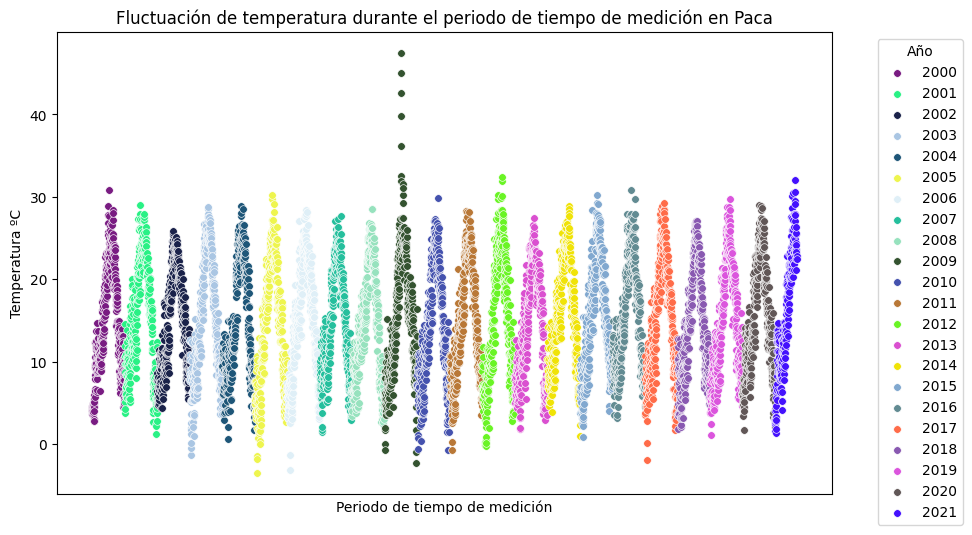

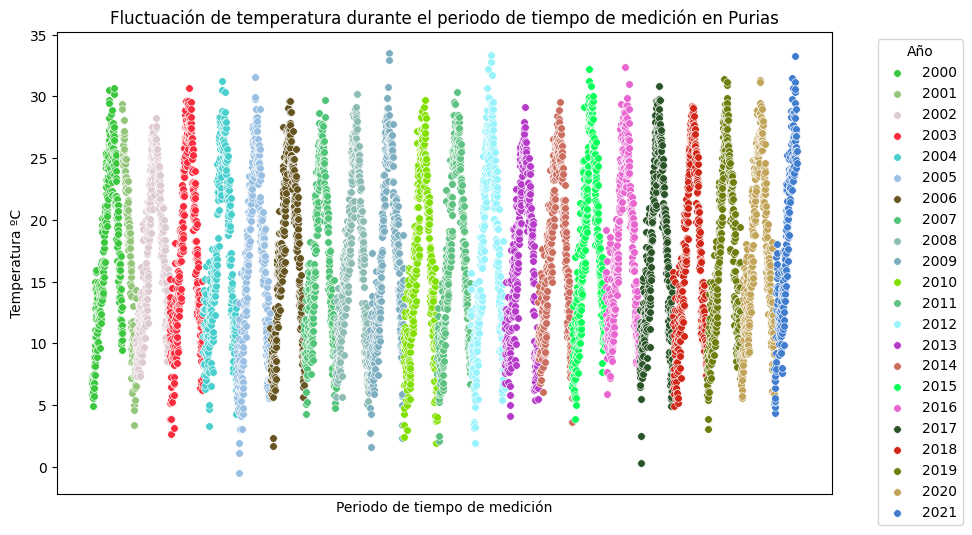

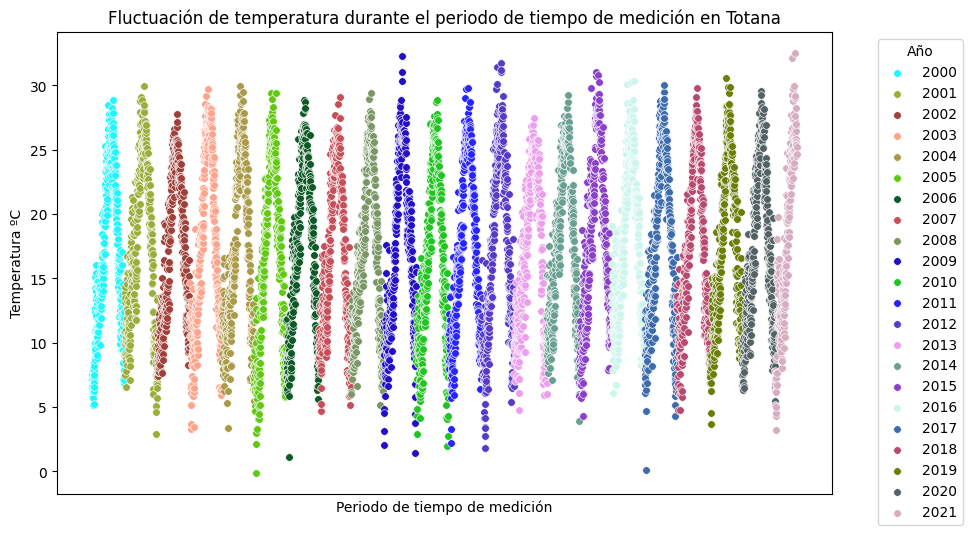

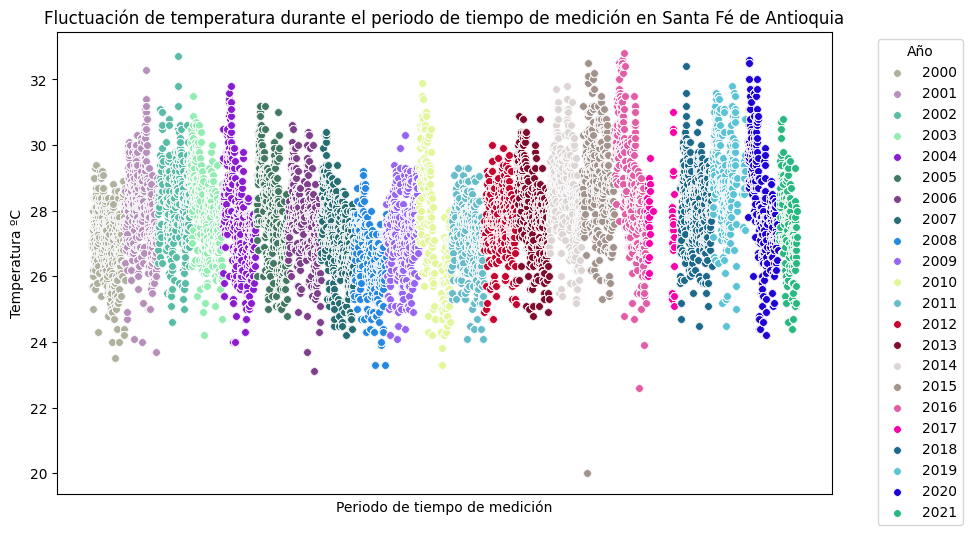

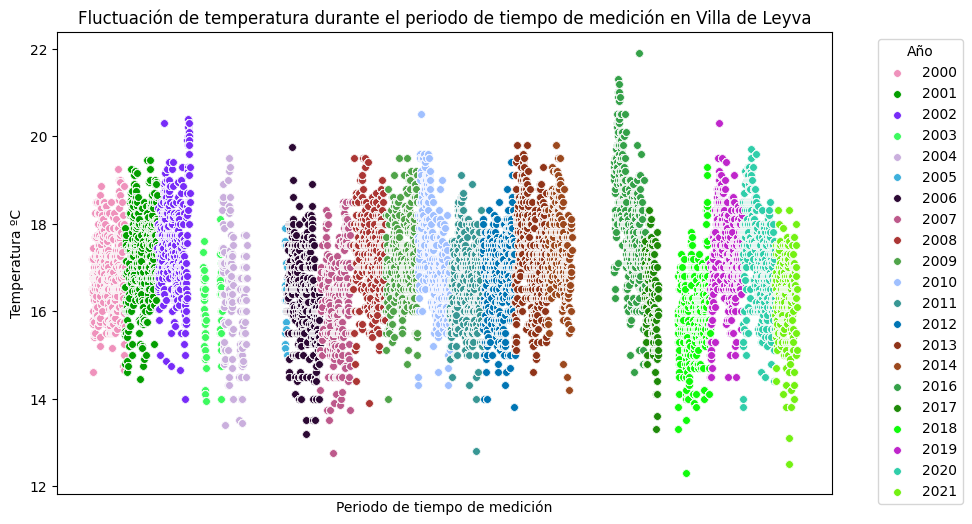

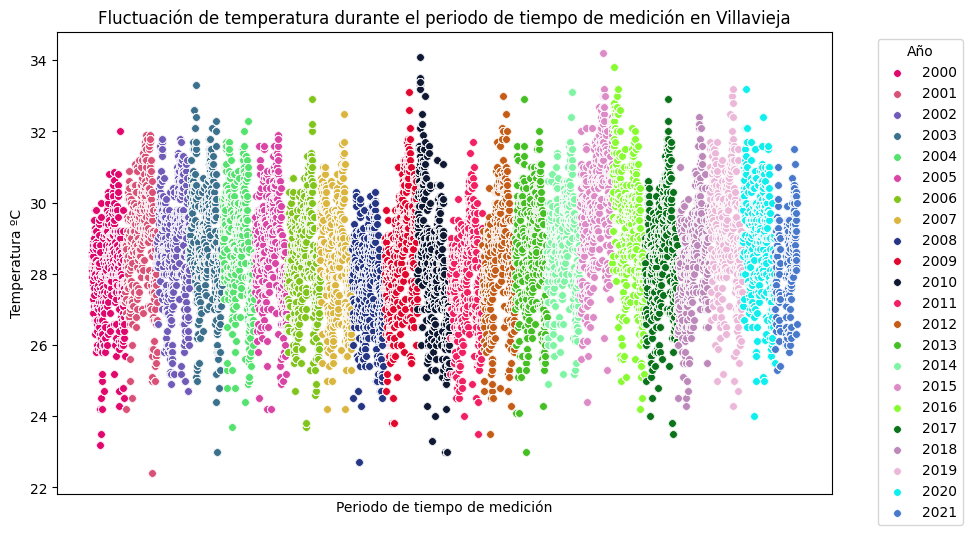

In [279]:
for i in range(len(dataframes_esp)):
    dataset_esp = dataframes_esp[i]
    nombre_esp = nombres_esp[i]
    fluctuacion_periodo('fecha','temp_media_(oc)', dataset_esp, nombre_esp)

# Process datasets for Colombia
for i in range(len(dataframes_col)):
    dataset_col = dataframes_col[i]
    nombre_col = nombres_col[i]
    fluctuacion_periodo('Fecha','temp_media_(oc)', dataset_col, nombre_col)

In [280]:
def Temperatura_media_mensual_mes(x,y,capas,nombres):

    plt.figure(figsize=(10, 6))

    p1=sns.boxplot(x=x, y=y, data=capas[0], color='blue', width=0.4, medianprops={'color': 'black'}, showfliers=False)
    p2=sns.boxplot(x=x, y=y, data=capas[1], color='red', width=0.3, medianprops={'color': 'black'}, showfliers=False)
    p3=sns.boxplot(x=x, y=y, data=capas[2], color='green', width=0.2, medianprops={'color': 'black'}, showfliers=False)

    plt.title(f'Temperatura Media por Mes para {nombres[0]}, {nombres[1]} y {nombres[2]}')
    plt.xlabel('Mes')
    plt.ylabel('Temperatura (°C)')
    plt.savefig(f'./output/temp_med_mes_{nombres[0]}_{nombres[1]}_y_{nombres[2]}.png', bbox_inches='tight')  # Specify the filename and format
    plt.show()

In [281]:
def Temperatura_media_mensual_mes_todas(x,y,capas,nombres):

    plt.figure(figsize=(10, 6))

    p1=sns.boxplot(x=x, y=y, data=capas[0], color='blue', width=0.4, medianprops={'color': 'black'}, showfliers=False)
    p2=sns.boxplot(x=x, y=y, data=capas[1], color='red', width=0.3, medianprops={'color': 'black'}, showfliers=False)
    p3=sns.boxplot(x=x, y=y, data=capas[2], color='green', width=0.2, medianprops={'color': 'black'}, showfliers=False)
    p4=sns.boxplot(x=x, y=y, data=capas[3], color='orange', width=0.4, medianprops={'color': 'black'}, showfliers=False)
    p5=sns.boxplot(x=x, y=y, data=capas[4], color='purple', width=0.3, medianprops={'color': 'black'}, showfliers=False)
    p6=sns.boxplot(x=x, y=y, data=capas[5], color='yellow', width=0.2, medianprops={'color': 'black'}, showfliers=False)

    plt.title(f'Temperatura Media por Mes para {nombres[0]}, {nombres[1]}, {nombres[2]}, {nombres[3]}, {nombres[4]} y {nombres[5]}')
    plt.xlabel('Mes')
    plt.ylabel('Temperatura (°C)')
    plt.savefig(f'./output/temp_med_mes_{nombres[0]}_{nombres[1]}_{nombres[2]}_{nombres[3]}_{nombres[4]}_y_{nombres[5]}.png', bbox_inches='tight')  # Specify the filename and format
    plt.show()

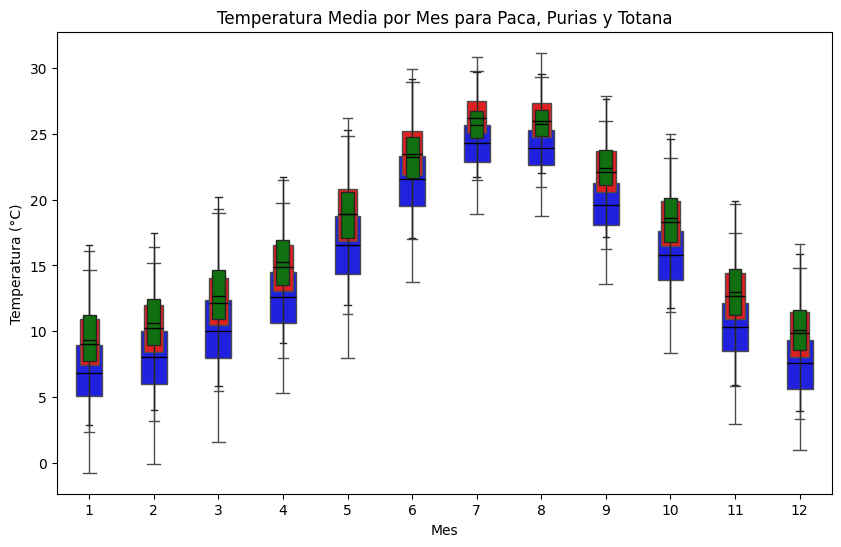

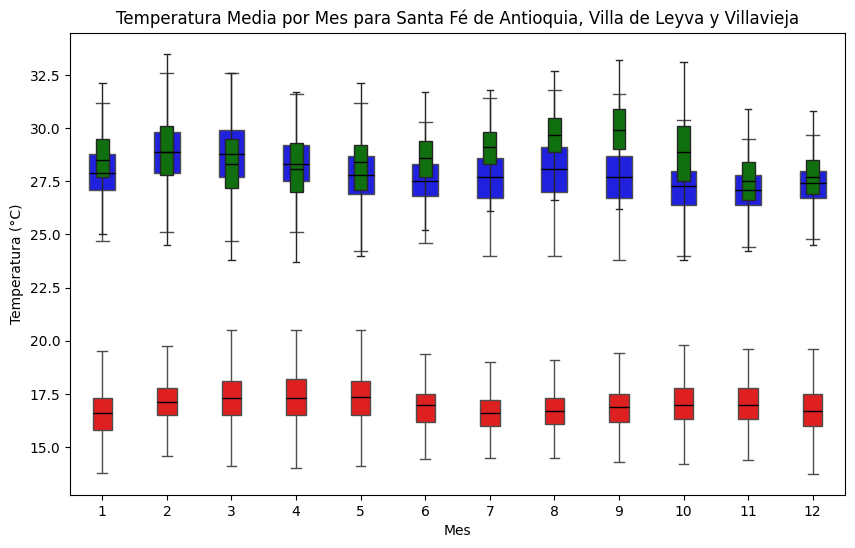

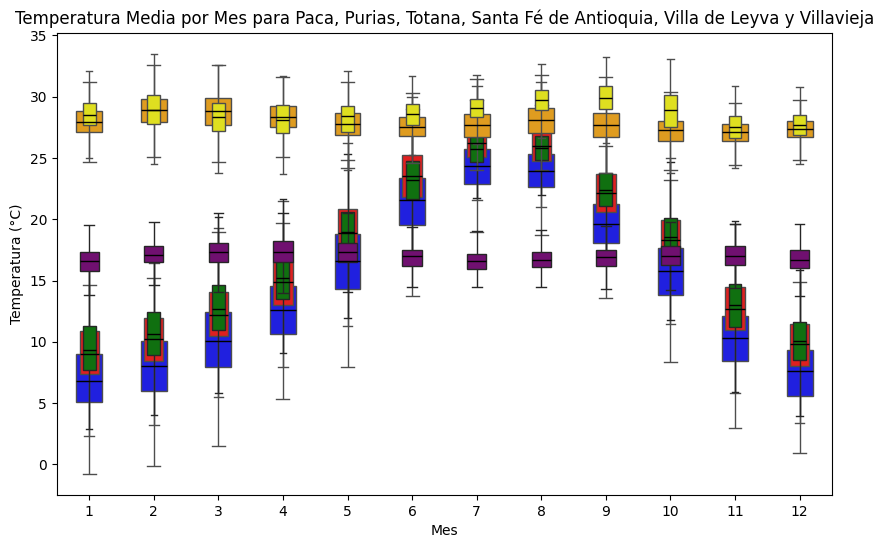

In [282]:
Temperatura_media_mensual_mes('mes','temp_media_(oc)',dataframes_esp,nombres_esp)
Temperatura_media_mensual_mes('mes','temp_media_(oc)',dataframes_col,nombres_col)
Temperatura_media_mensual_mes_todas('mes','temp_media_(oc)',dataframes_todas,nombres_todas)

In [283]:
def temp_med_mes_anno(x,y,capas,nombres):

    plt.figure(figsize=(10, 6))

    sns.boxplot(x=x, y=y, data=capas[0], color='blue', width=0.6, medianprops={'color': 'black'}, showfliers=False)
    sns.boxplot(x=x, y=y, data=capas[1], color='red', width=0.4, medianprops={'color': 'black'}, showfliers=False)
    sns.boxplot(x=x, y=y, data=capas[2], color='green', width=0.2, medianprops={'color': 'black'}, showfliers=False)

    plt.title(f'Temperatura Media Mensual por Año en {nombres[0]}, {nombres[1]} y {nombres[2]}')
    plt.xlabel('Año')
    plt.ylabel('Temperatura (°C)')
    plt.savefig(f'./output/temp_med_mes_anno{nombres[0]},{nombres[1]}_y_{nombres[2]}.png', bbox_inches='tight')  # Specify the filename and format
    plt.show()

In [284]:
def temp_med_mes_anno_todas(x,y,capas,nombres):

    plt.figure(figsize=(10, 6))

    sns.boxplot(x=x, y=y, data=capas[0], color='blue', width=0.6, medianprops={'color': 'black'}, showfliers=False)
    sns.boxplot(x=x, y=y, data=capas[1], color='red', width=0.4, medianprops={'color': 'black'}, showfliers=False)
    sns.boxplot(x=x, y=y, data=capas[2], color='green', width=0.2, medianprops={'color': 'black'}, showfliers=False)
    sns.boxplot(x=x, y=y, data=capas[3], color='orange', width=0.2, medianprops={'color': 'black'}, showfliers=False)
    sns.boxplot(x=x, y=y, data=capas[4], color='purple', width=0.2, medianprops={'color': 'black'}, showfliers=False)
    sns.boxplot(x=x, y=y, data=capas[5], color='yellow', width=0.2, medianprops={'color': 'black'}, showfliers=False)

    plt.title(f'Temperatura Media Mensual por Año en {nombres[0]}, {nombres[1]}, {nombres[2]}, {nombres[3]}, {nombres[4]} y {nombres[5]}')
    plt.xlabel('Año')
    plt.ylabel('Temperatura (°C)')
    plt.savefig(f'./output/temp_med_mes_anno{nombres[0]},{nombres[1]},{nombres[2]},{nombres[3]},{nombres[4]}_y_{nombres[5]}.png', bbox_inches='tight')  # Specify the filename and format
    plt.show()

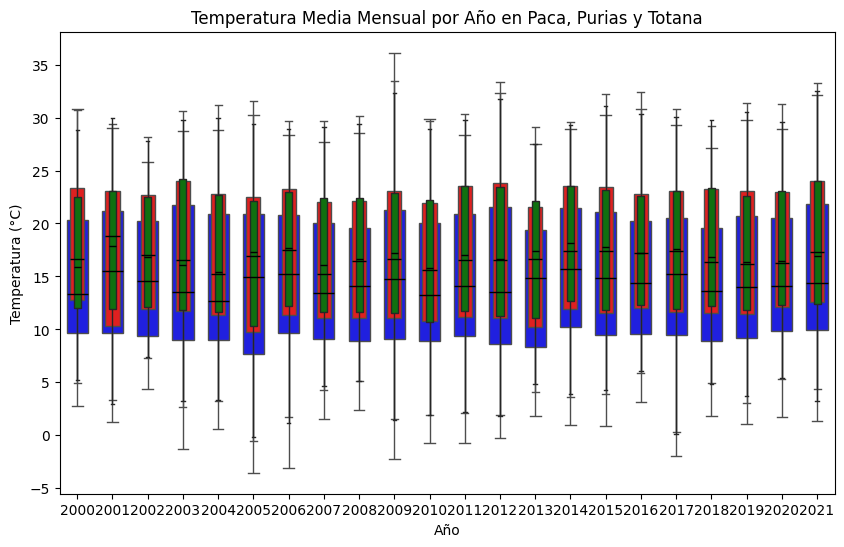

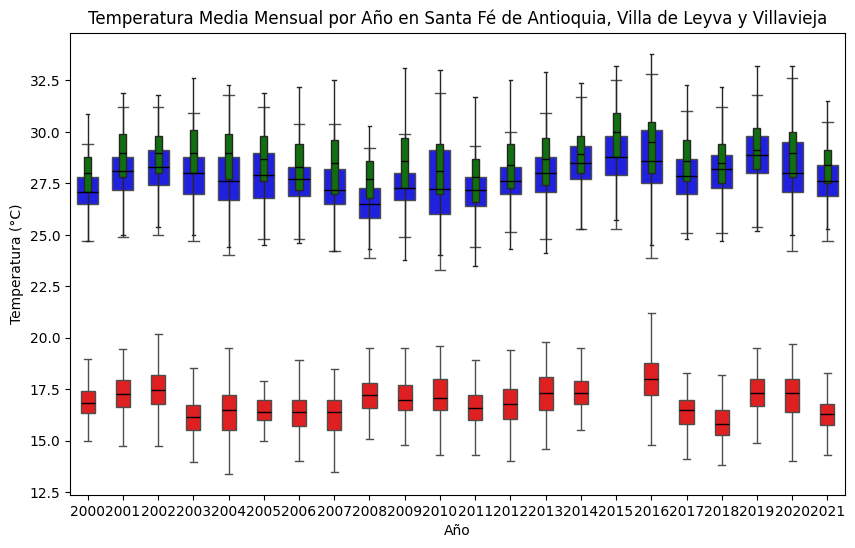

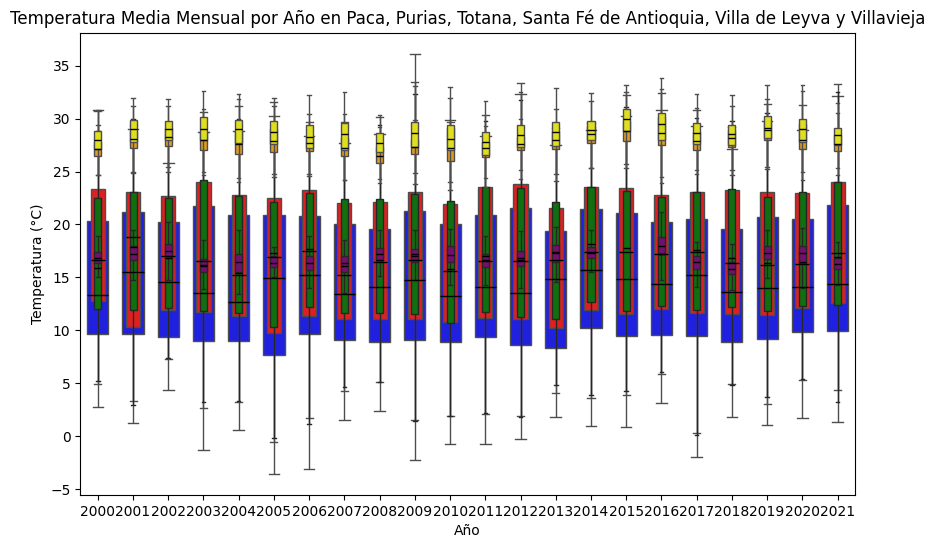

In [285]:
temp_med_mes_anno('anno','temp_media_(oc)',dataframes_esp,nombres_esp)
temp_med_mes_anno('anno','temp_media_(oc)',dataframes_col,nombres_col)
temp_med_mes_anno_todas('anno','temp_media_(oc)',dataframes_todas,nombres_todas)

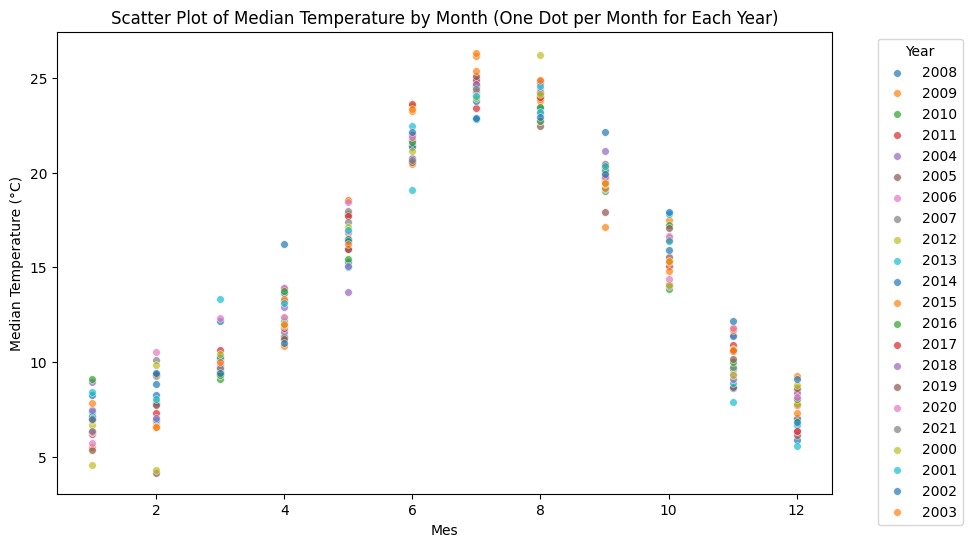

In [286]:
plt.figure(figsize=(10, 6))


numeric_columns = paca.select_dtypes(include=['float64']).columns.difference(['anno', 'mes'])
for year in paca['anno'].unique():
    data_for_year = paca[paca['anno'] == year]
    agg_data = data_for_year.groupby('mes')[numeric_columns].median().reset_index()
    sns.scatterplot(x='mes', y='temp_media_(oc)', data=agg_data, label=str(year), alpha=0.7, s=30)

plt.title('Scatter Plot of Median Temperature by Month (One Dot per Month for Each Year)')
plt.xlabel('Mes')
plt.ylabel('Median Temperature (°C)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./output/aaaa.png', bbox_inches='tight')  # Specify the filename and format
plt.show()

In [287]:
def line_plot(x,y,dataset,nombre):

    numeric_columns = dataset.select_dtypes(include=['float64']).columns

    plt.figure(figsize=(10, 6))

    for decade in dataset['decada'].unique():
        data_for_decade = dataset[dataset['decada'] == decade]
        agg_data = data_for_decade.groupby('mes')[numeric_columns].median().reset_index()
        
        sns.scatterplot(x=x, y=y, data=agg_data, label=str(decade)+'s', alpha=1, s=30)
        sns.lineplot(x=x, y=y, data=agg_data, label='', alpha=1,linewidth=3)

    plt.title(f'Diagrama Lineal de la temperatura media por mes para cada década en {nombre}')
    plt.xlabel('Mes')
    plt.ylabel('Temperatura Media (°C)')
    plt.legend(title='Década', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f'./output/temp_fluc_deca_{nombre}.png', bbox_inches='tight')  # Specify the filename and format
    plt.show()

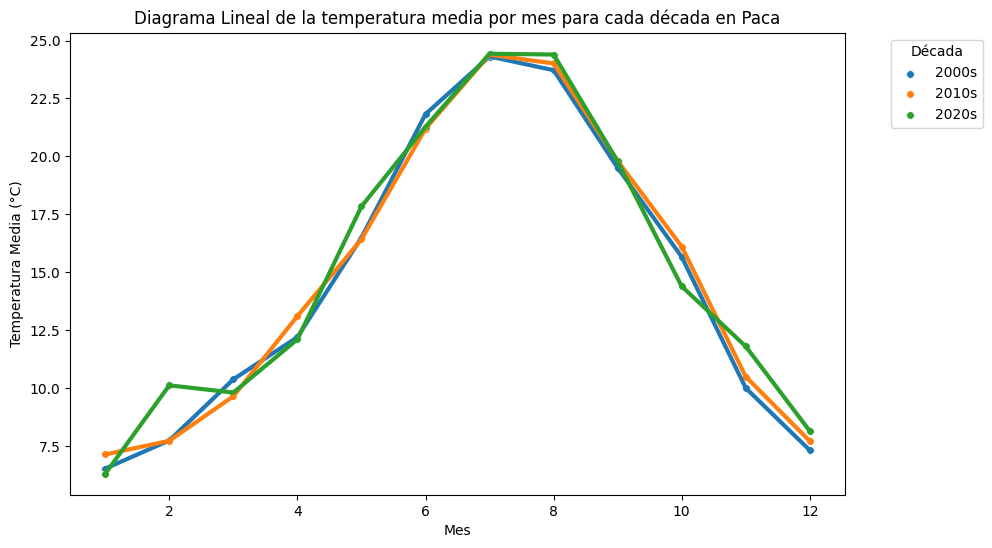

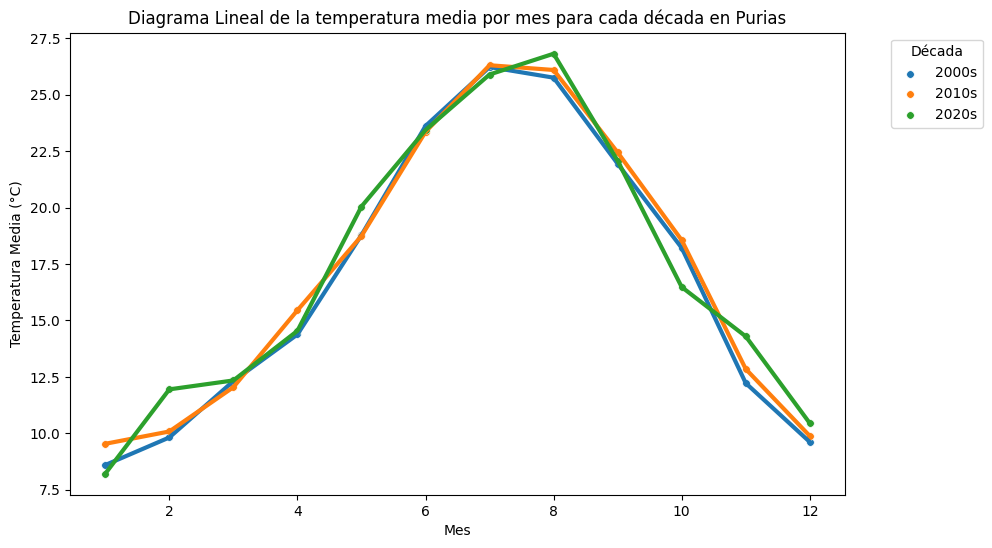

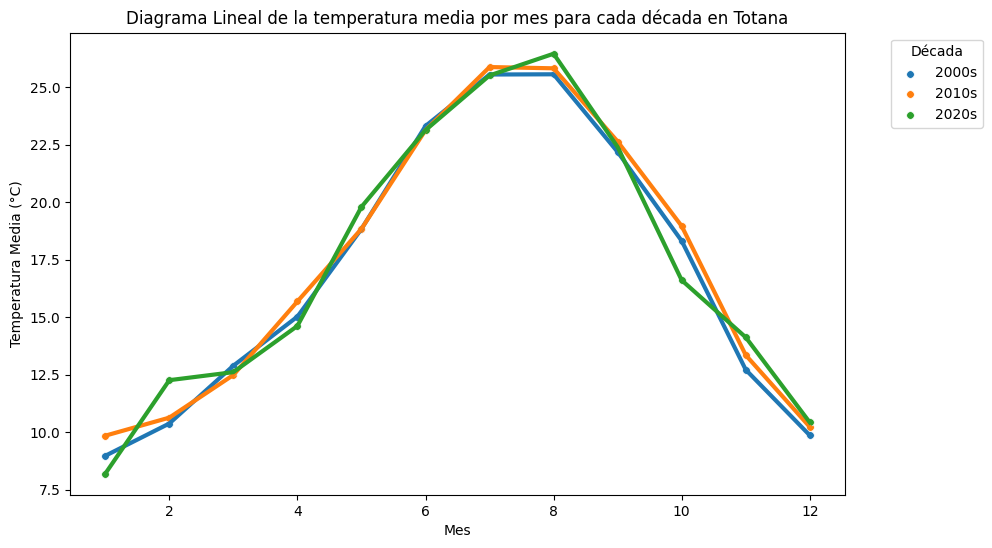

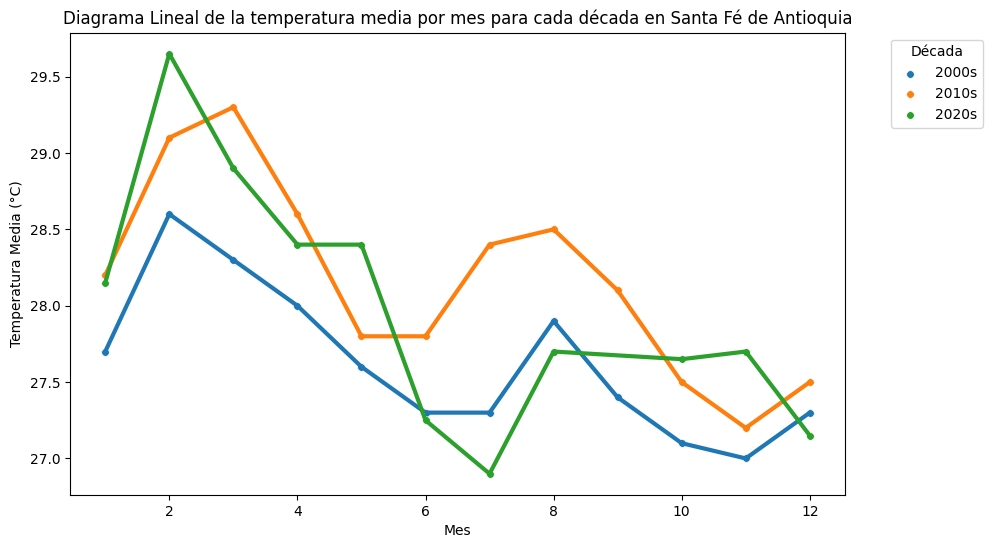

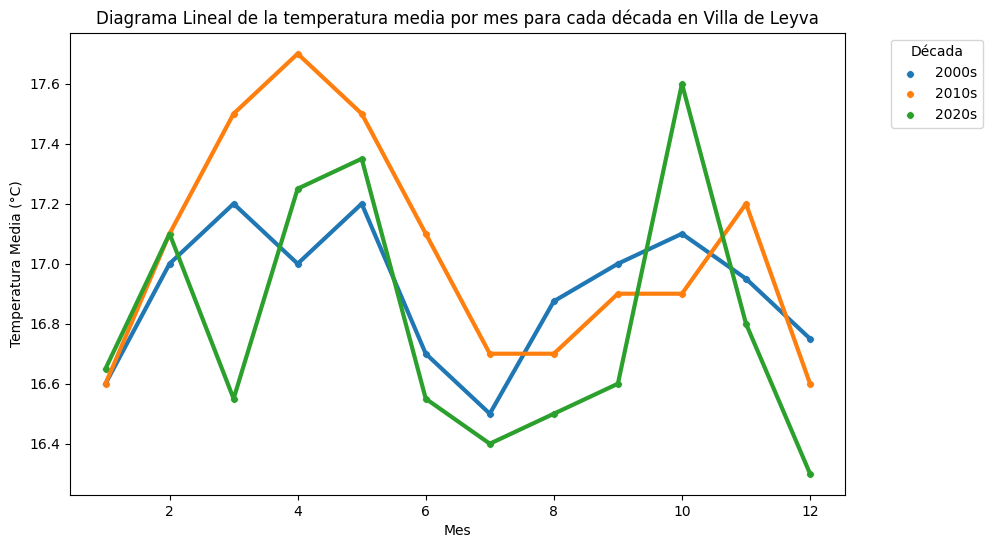

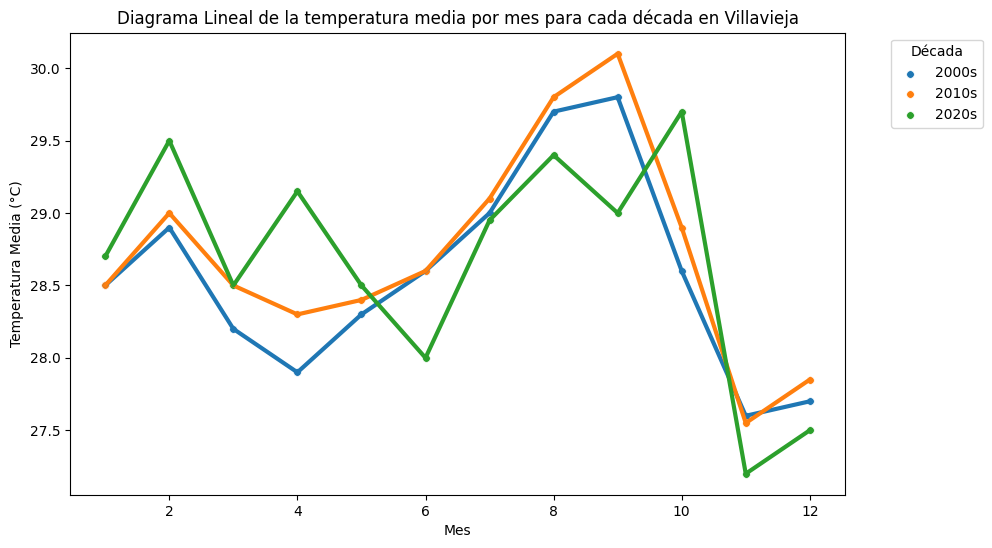

In [288]:
for i in range(len(dataframes_esp)):
    dataset_esp = dataframes_esp[i]
    nombre_esp = nombres_esp[i]
    line_plot('mes','temp_media_(oc)', dataset_esp, nombre_esp)

for i in range(len(dataframes_col)):
    dataset_col = dataframes_col[i]
    nombre_col = nombres_col[i]
    line_plot('mes','temp_media_(oc)', dataset_col, nombre_col)

In [289]:
variable_to_compare = 'temp_media_(oc)'

# Drop NaN values to ensure the t-test can be performed
data_for_station1 = totana[variable_to_compare].dropna()
data_for_station2 = purias[variable_to_compare].dropna()

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(data_for_station1, data_for_station2)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check if the difference is statistically significant (using a common significance level of 0.05)
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

T-statistic: 1.1004021632521235
P-value: 0.2711740045101717
The difference is not statistically significant.


In [290]:
def temp_dist(y,capas,nombres):

    plt.figure(figsize=(10, 6))


    sns.kdeplot(capas[0][y].dropna(), label=nombres[0], color='blue', linewidth=3)
    sns.kdeplot(capas[1][y].dropna(), label=nombres[1], color='red', linewidth=3)
    sns.kdeplot(capas[2][y].dropna(), label=nombres[2], color='green', linewidth=3)


    plt.title(f'Distribución de Temperatura (°C) para {nombres[0]}, {nombres[1]} y {nombres[2]}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Densidad probabilística')
    plt.legend()

    plt.savefig(f'./output/dist_temp_{nombres[0]},{nombres[1]}_y_{nombres[2]}.png', bbox_inches='tight')  # Specify the filename and format
    plt.show()

In [291]:
def temp_dist_todas(y,capas,nombres):

    plt.figure(figsize=(10, 6))


    sns.kdeplot(capas[0][y].dropna(), label=nombres[0], color='blue', linewidth=3)
    sns.kdeplot(capas[1][y].dropna(), label=nombres[1], color='red', linewidth=3)
    sns.kdeplot(capas[2][y].dropna(), label=nombres[2], color='green', linewidth=3)
    sns.kdeplot(capas[3][y].dropna(), label=nombres[3], color='orange', linewidth=3)
    sns.kdeplot(capas[4][y].dropna(), label=nombres[4], color='purple', linewidth=3)
    sns.kdeplot(capas[5][y].dropna(), label=nombres[5], color='yellow', linewidth=3)


    plt.title(f'Distribución de Temperatura (°C) para {nombres[0]}, {nombres[1]}, {nombres[2]}, {nombres[3]}, {nombres[4]} y {nombres[5]}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Densidad probabilística')
    plt.legend()

    plt.savefig(f'./output/dist_temp_{nombres[0]},{nombres[1]},{nombres[2]},{nombres[3]},{nombres[4]}_y_{nombres[5]}.png', bbox_inches='tight')  # Specify the filename and format
    plt.show()

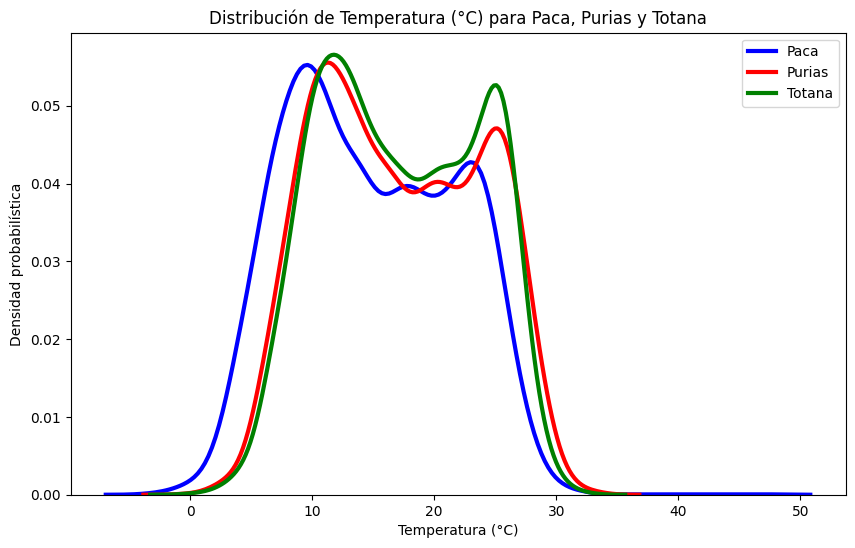

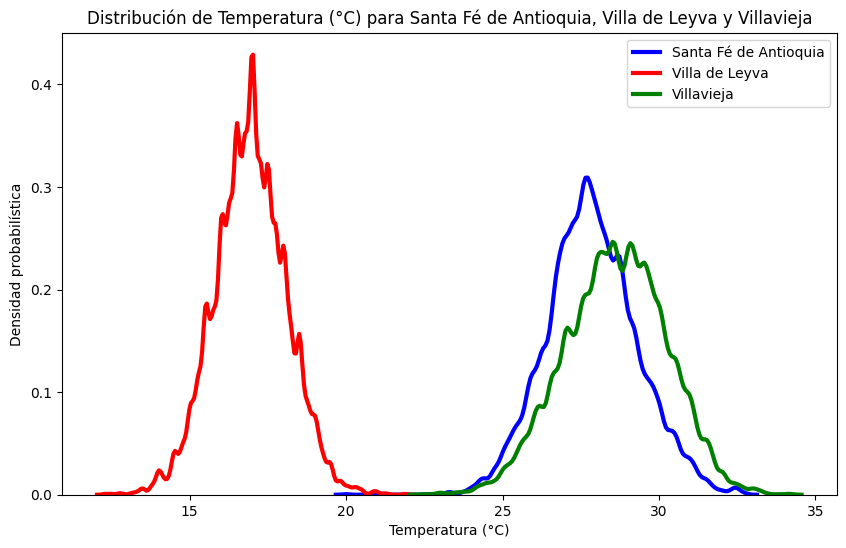

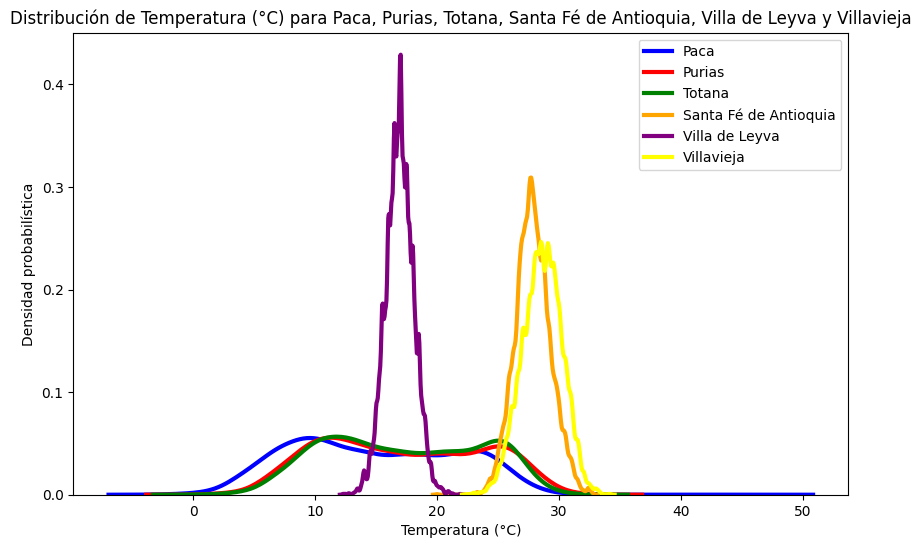

In [292]:
temp_dist('temp_media_(oc)',dataframes_esp,nombres_esp)
temp_dist('temp_media_(oc)',dataframes_col,nombres_col)
temp_dist_todas('temp_media_(oc)',dataframes_todas,nombres_todas)